In [1]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import configparser
import seaborn
import matplotlib as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [3]:
uri = 'spotify:user:ernflerberg:playlist:7I2vgcXF2DBLsmC7EqahC0'
username = username



#aaron's like playlist 6ygnOWyCTMajdAY3vFM5BA
#aaron's dislike playlist 7I2vgcXF2DBLsmC7EqahC0?si=MI4T0e1UQd-ftV0tWHp_1A
playlist_id = "7I2vgcXF2DBLsmC7EqahC0" #add the last part of the playlist url here. https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA

results = spotify.user_playlist(username, playlist_id)


In [4]:
results['tracks']['items'][0]['track']['id']

'35RDmXJ59YYGNlv1KfTGsP'

In [5]:
df = []
for i in results['tracks']['items']:
    df.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
df = pd.DataFrame(df)  
df.head()

,0,1,2,3,4,5,6
0,35RDmXJ59YYGNlv1KfTGsP,2019-04-24T06:21:44Z,SZA,"Power is Power (feat. SZA, The Weeknd, Travis ...",211266,"Power is Power (feat. SZA, The Weeknd, Travis ...",79
1,40Zb4FZ6nS1Hj8RVfaLkCV,2019-04-24T06:22:07Z,French Montana,Slide (feat. Blueface & Lil Tjay),186344,Slide (feat. Blueface & Lil Tjay),72
2,3tTV4DYlhkiXRNiiXwIAPf,2019-04-24T06:22:18Z,Madonna,Medellín (with Maluma),298164,Medellín (with Maluma),75
3,10RQKVSr4rS0coExTmi4dF,2019-04-24T06:23:39Z,Carrie Underwood,Greatest Hits: Decade #1,238173,Something in the Water,60
4,20DfkHC5grnKNJCzZQB6KC,2019-04-24T06:23:43Z,Carrie Underwood,Blown Away,205560,Good Girl,60


In [6]:
df.columns = ['song_id','added_at','Artist','Album','Durastion_ms','Song','Popularity']

In [7]:
df.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity
0,35RDmXJ59YYGNlv1KfTGsP,2019-04-24T06:21:44Z,SZA,"Power is Power (feat. SZA, The Weeknd, Travis ...",211266,"Power is Power (feat. SZA, The Weeknd, Travis ...",79
1,40Zb4FZ6nS1Hj8RVfaLkCV,2019-04-24T06:22:07Z,French Montana,Slide (feat. Blueface & Lil Tjay),186344,Slide (feat. Blueface & Lil Tjay),72
2,3tTV4DYlhkiXRNiiXwIAPf,2019-04-24T06:22:18Z,Madonna,Medellín (with Maluma),298164,Medellín (with Maluma),75
3,10RQKVSr4rS0coExTmi4dF,2019-04-24T06:23:39Z,Carrie Underwood,Greatest Hits: Decade #1,238173,Something in the Water,60
4,20DfkHC5grnKNJCzZQB6KC,2019-04-24T06:23:43Z,Carrie Underwood,Blown Away,205560,Good Girl,60


In [8]:
sp = spotipy.Spotify(auth=token)

In [9]:
et = []
for i in df.song_id:
    x = sp.audio_features(i)
    et.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
et = pd.DataFrame(et)

In [10]:
et.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]


In [11]:
DF = pd.merge(df, et, on='song_id')

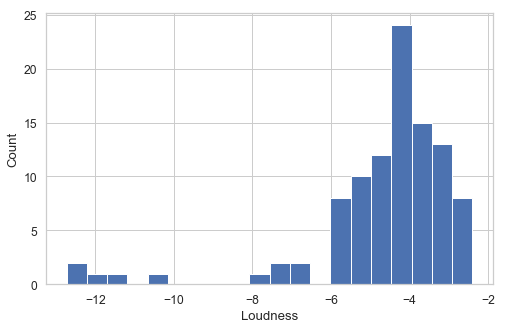

In [12]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    DF['loudness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Loudness', ylabel='Count');

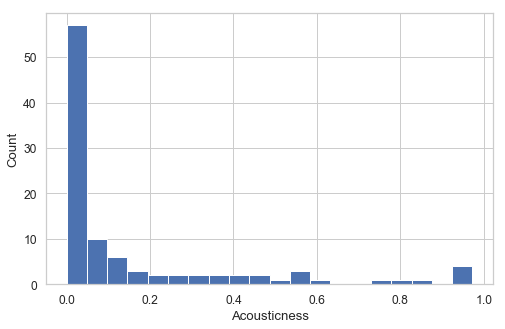

In [13]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    DF['acousticness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Acousticness', ylabel='Count');

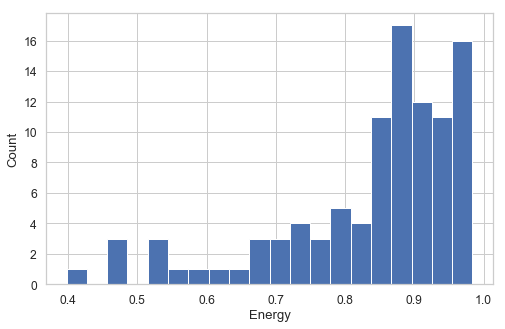

In [14]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    DF['energy'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Energy', ylabel='Count');

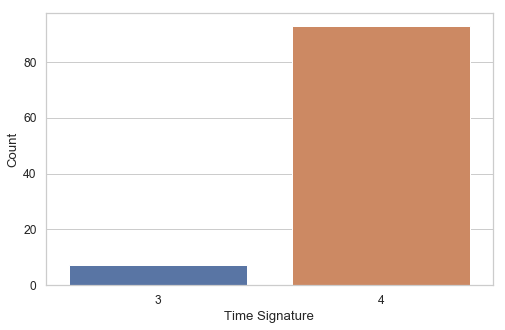

In [15]:
seaborn.countplot(DF['time_signature']).set(xlabel='Time Signature', ylabel='Count');

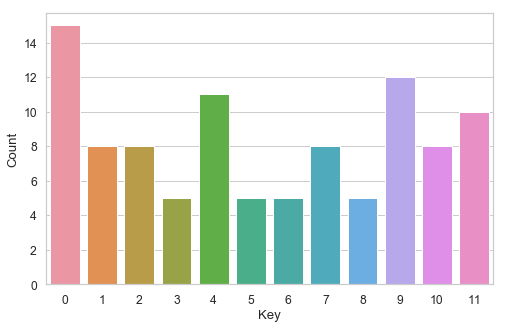

In [16]:
seaborn.countplot(DF['key']).set(xlabel='Key', ylabel='Count');

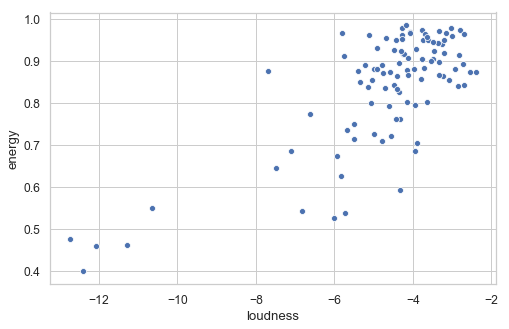

In [17]:
seaborn.scatterplot(x=DF['loudness'], y=DF['energy']);

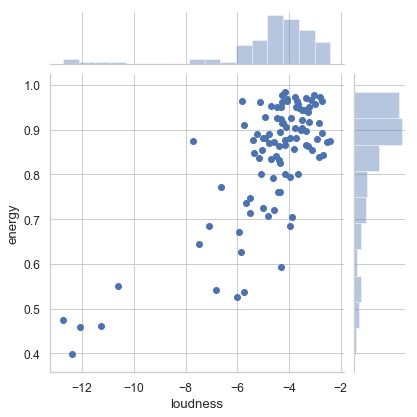

In [18]:
seaborn.jointplot(x=et['loudness'], y=et['energy']);

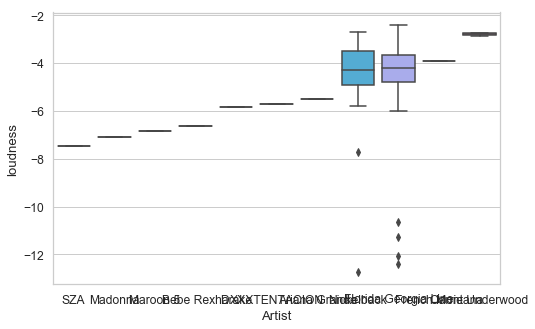

In [19]:
sorted_nb = DF.groupby(['Artist'])['loudness'].median().sort_values()
seaborn.boxplot(x=DF['Artist'], y=DF['loudness'], order=list(sorted_nb.index))